# CNN网络图片读取部分，主要包括图片前处理和生成训练集的操作

In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
class Dataset(object):
    '''数据集类 用来生成训练集和测试集数据'''
    def __init__(self, root_dir, dataset, sub_set, 
                 batch_size, n_label, data_aug=False, shuffle=True):
        np.random.seed(0)
        self.data_dir = os.path.join(root_dir, dataset, sub_set)  # 进入label目录
        self.batch_size = batch_size  # batch_size=64
        self.n_label = n_label  # n_label=65
        self.xs, self.ys = self.load_data()  # 获得训练集和label
        self._num_examples = len(self.xs)  # 训练集样本数
        self.data_aug = data_aug  # 是否数据扩增，否
        self.shuffle = shuffle  # 是否打算训练集顺序，训练集打乱，验证集和测试集不打乱
        self.init_epoch()
    
    def load_data(self):
        xs = []
        ys = []
        label_dirs = os.listdir(self.data_dir)
        label_dirs.sort()
        for _label_dir in label_dirs:
            category = int(_label_dir[2:])
            label = np.zeros(self.n_label)
            label[category] = 1    # 将label用one-hot向量表示
            imgs_name = os.listdir(os.path.join(self.data_dir, _label_dir))  # 返回某一类别下的img列表
            imgs_name.sort()
            for img_name in imgs_name:
                im_ar = cv.imread(os.path.join(self.data_dir, _label_dir, img_name))  # 读取img
                im_ar = cv.cvtColor(im_ar, cv.COLOR_BGR2RGB)  # 将BGE彩色图像转换为RGB彩色图像
                im_ar = np.asarray(im_ar)  # 转化为ndarray
                im_ar = self.preprocess(im_ar)  # 图片前处理，调整大小为224*224并进行归一化
                xs.append(im_ar)  # 存入x列表
                ys.append(label)  # 存入label列表
        return xs, ys
    
    def preprocess(self, im_ar):  # 调整图片尺寸和像素强度
        '''Resize raw image to a fixed size, and scale the pixel intensities.'''
        im_ar = cv.resize(im_ar, (48, 48))
        im_ar = im_ar / 255.0
        return im_ar
    
    ##生成下一个batch的训练数据
    def next_batch(self):
        if not self.has_next_batch():
            self.init_epoch()#return None
        print(self.cur_index)
        x_batch = []
        y_batch = []
        for i in range(self.batch_size):
            x_batch.append(self.xs[self.indices[self.cur_index + i]])
            y_batch.append(self.ys[self.indices[self.cur_index + i]])
        self.cur_index += self.batch_size
        return np.asarray(x_batch), np.asarray(y_batch)
    
    #判断是否还有下一个batch
    def has_next_batch(self):
        start = self.cur_index
        end = self.batch_size + start
        if end > self._num_examples:
            return False
        else:
            return True
    
    def init_epoch(self):
        #所有数据参与过一次训练后，打乱顺序生成新的训练数据
        self.cur_index = 0
        self.indices = np.arange(self._num_examples)
        if self.shuffle:
            np.random.shuffle(self.indices)
        


# img_preprocess 输入一张钢印图片,返回钢印分割后四个字符图片列表

In [2]:
# 识别图片圆形
def circle_identify(filepath):
    img = cv.imread(filepath)
    cimg = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    #使用霍夫变换检测图像中的圆
    circles = cv.HoughCircles(cimg,cv.HOUGH_GRADIENT, dp=1, minDist=100,
                              param1=100, param2=28,minRadius=20,maxRadius=50)
    cimg = cv.cvtColor(cimg, cv.COLOR_GRAY2BGR)
    plt.imshow(cimg)
    plt.show()
    circles = np.uint16(np.around(circles))
    return circles

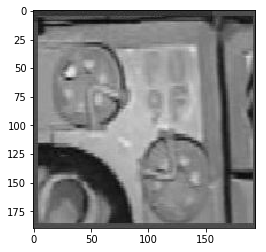

In [3]:
c1 = circle_identify("/Users/sunchao/Desktop/核工业计算机应用研究所/SteelSealIdentify/testResult/cropImagesByHand/03.jpg")

In [4]:
c1[0, :]

array([[ 36,  66,  45],
       [ 26, 166,  20],
       [126, 140,  29]], dtype=uint16)

In [5]:
os.chdir("/Users/sunchao/Desktop/核工业计算机应用研究所/SteelSealIdentify/demo/demo/")

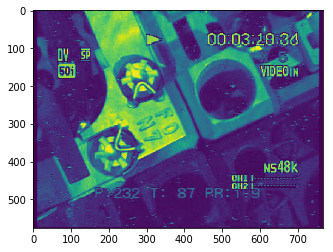

In [6]:
import matplotlib.pyplot as plt
img = cv.imread("./data/gangyin_source/F0N7.png")
cimg = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# cimg=cv.merge([b,g,r])
plt.imshow(cimg)
plt.show()

In [7]:
#使用霍夫变换检测图像中的圆
circles = cv.HoughCircles(cimg,cv.HOUGH_GRADIENT, dp=1, minDist=100,
                              param1=100, param2=28,minRadius=50,maxRadius=75)
cimg = cv.cvtColor(cimg, cv.COLOR_GRAY2BGR)
circles = np.uint16(np.around(circles))

In [8]:
circles[0,:]

array([[212, 368,  70],
       [502, 202,  69],
       [282, 190,  54]], dtype=uint16)

In [14]:
circles[0:,]

array([[[212, 368,  70],
        [502, 202,  69],
        [282, 190,  54]]], dtype=uint16)

In [15]:
center = []
for i in circles[0,:]:
    cv.circle(cimg, (i[0],i[1]),i[2],(0,0,255),2)
    cv.circle(cimg, (i[0], i[1]), 2,(0, 255, 0), 3)
    center.append((i[0],i[1]))

In [16]:
center

[(212, 368), (502, 202), (282, 190)]

In [17]:
p1 = np.array(center[0], np.float32)
p2 = np.array(center[1], np.float32)
p3 = np.array(center[2], np.float32)

In [18]:
p1

array([212., 368.], dtype=float32)

In [19]:
p2

array([502., 202.], dtype=float32)

In [20]:
p3

array([282., 190.], dtype=float32)

In [21]:
cent = (((p2 - p1)*co + p1)[0], ((p2 - p1)*co + p1)[1])

In [24]:
(p2-p1)*co

array([118.9 , -68.06], dtype=float32)

In [22]:
cent

(330.9, 299.94)

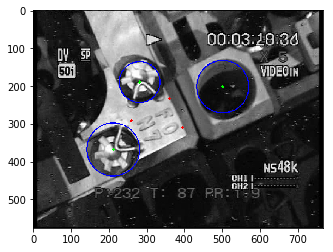

In [9]:
#计算用于仿射变换的坐标点，是写死的，需要改进
center = []
for i in circles[0,:]:
    cv.circle(cimg, (i[0],i[1]),i[2],(0,0,255),2)
    cv.circle(cimg,(i[0],i[1]),2,(0,255,0),3)
    center.append((i[0],i[1]))
p1 = np.array(center[0], np.float32)
p2 = np.array(center[1], np.float32)
p3 = np.array(center[2], np.float32)
co = 0.41  #调整钢印定位点的位置
cent = (((p2 - p1)*co + p1)[0], ((p2 - p1)*co + p1)[1])
co_up = 0.35
up = (((p3 - cent)*co_up + cent)[0], ((p3 - cent)*co_up + cent)[1])
co_left = 0.55
left = (((cent - p1)*co_left + p1)[0], ((cent - p1)*co_left + p1)[1])
co_right = 0.28
right = (((p2 - cent)*co_right + cent)[0], ((p2 - cent)*co_right + cent)[1])
co_bot = -0.35
bot = (((p3 - cent)*co_bot + cent)[0], ((p3 - cent)*co_bot + cent)[1])
first = (right[0] - cent[0] + up[0], right[1] - cent[1] + up[1])
second = (right[0] - (first[0] -right[0]),right[1] - (first[1] -right[1]))
third = (up[0] - (cent[0] - left[0]), up[1] - (cent[1] - left[1]))

    #cv.circle(cimg, cent, 2, (255,0,0),3)
    #cv.circle(cimg, up, 2, (255,0,0),3)
    #cv.circle(cimg, left, 2, (255,0,0),3)
    #cv.circle(cimg, right, 2, (255,0,0),3)
cv.circle(cimg, first, 2, (255,0,0),3)
    #cv.circle(cimg, bot, 2, (255,0,0),3)
cv.circle(cimg, second, 2, (255,0,0),3)
cv.circle(cimg, third, 2, (255,0,0),3)

plt.imshow(cimg)
plt.show()

In [9]:
#仿射变换，将倾斜图片调正
p1 = np.array(first)
p2 = np.array(second)
p3 = np.array(third)

pts1 = np.float32([p1,p2,p3])
w = np.sqrt(np.square(p1[0]-p2[0]) + np.square(p1[1]-p2[1]))
h = np.sqrt(np.square(p1[0]-p3[0]) + np.square(p1[1]-p3[1]))
pts2 = np.float32([[0,0],[w,0],[0,h]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(int(w),int(h)))

In [11]:
ims = []
w1, h1 = dst.shape[:2]
ims.append(dst[0:int(w1/2), 0:int(h1/2)])
ims.append(dst[0:int(w1/2), int(h1/2):h1])
ims.append(dst[int(w1/2):w1, 0:int(h1/2)])
ims.append(dst[int(w1/2):w1, int(h1/2):h1])

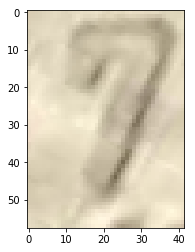

In [15]:
plt.imshow(ims[3])
plt.show()

In [16]:
def img_pro():
    img_name = "F0N7.png"
    img = cv.imread("./data/gangyin_source/"+img_name)
    cimg = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    cv.imshow('src', img)
    #cv.imshow('gray',cimg)
    cv.waitKey(0)

    #使用霍夫变换检测图像中的圆
    circles = cv.HoughCircles(cimg,cv.HOUGH_GRADIENT, 1,100,
                              param1=100, param2=28,minRadius=50,maxRadius=75)
    cimg = cv.cvtColor(cimg, cv.COLOR_GRAY2BGR)
    circles = np.uint16(np.around(circles))

    #计算用于仿射变换的坐标点，是写死的，需要改进
    center = []
    for i in circles[0,:]:
        cv.circle(cimg, (i[0],i[1]),i[2],(0,0,255),2)
        cv.circle(cimg,(i[0],i[1]),2,(0,255,0),3)
        center.append((i[0],i[1]))
    p1 = np.array(center[0], np.float32)
    p2 = np.array(center[1], np.float32)
    p3 = np.array(center[2], np.float32)
    co = 0.41  #调整钢印定位点的位置
    cent = (((p2 - p1)*co + p1)[0], ((p2 - p1)*co + p1)[1])
    co_up = 0.35
    up = (((p3 - cent)*co_up + cent)[0], ((p3 - cent)*co_up + cent)[1])
    co_left = 0.55
    left = (((cent - p1)*co_left + p1)[0], ((cent - p1)*co_left + p1)[1])
    co_right = 0.28
    right = (((p2 - cent)*co_right + cent)[0], ((p2 - cent)*co_right + cent)[1])
    co_bot = -0.35
    bot = (((p3 - cent)*co_bot + cent)[0], ((p3 - cent)*co_bot + cent)[1])
    first = (right[0] - cent[0] + up[0], right[1] - cent[1] + up[1])
    second = (right[0] - (first[0] -right[0]),right[1] - (first[1] -right[1]))
    third = (up[0] - (cent[0] - left[0]), up[1] - (cent[1] - left[1]))

    #cv.circle(cimg, cent, 2, (255,0,0),3)
    #cv.circle(cimg, up, 2, (255,0,0),3)
    #cv.circle(cimg, left, 2, (255,0,0),3)
    #cv.circle(cimg, right, 2, (255,0,0),3)
    cv.circle(cimg, first, 2, (255,0,0),3)
    #cv.circle(cimg, bot, 2, (255,0,0),3)
    cv.circle(cimg, second, 2, (255,0,0),3)
    cv.circle(cimg, third, 2, (255,0,0),3)

    cv.imshow('circles', cimg)
    cv.waitKey(0)
    cv.destroyAllWindows()


    #仿射变换，将倾斜图片调正
    p1 = np.array(first)
    p2 = np.array(second)
    p3 = np.array(third)

    pts1 = np.float32([p1,p2,p3])
    w = np.sqrt(np.square(p1[0]-p2[0]) + np.square(p1[1]-p2[1]))
    h = np.sqrt(np.square(p1[0]-p3[0]) + np.square(p1[1]-p3[1]))
    pts2 = np.float32([[0,0],[w,0],[0,h]])
    M = cv.getAffineTransform(pts1,pts2)
    dst = cv.warpAffine(img,M,(int(w),int(h)))

    #cv.imwrite(".\GANGYINSRC\GANGYIN\\"+img_name,dst)
    cv.imshow("gangyin",dst)


    #print (dst.shape)
    #将钢印分割为单个字符，取各边中点进行分割
    ims = []
    w1, h1 = dst.shape[:2]
    ims.append(dst[0:int(w1/2), 0:int(h1/2)])
    ims.append(dst[0:int(w1/2), int(h1/2):h1])
    ims.append(dst[int(w1/2):w1, 0:int(h1/2)])
    ims.append(dst[int(w1/2):w1, int(h1/2):h1])

    cv.imshow('1',ims[1])
    cv.waitKey(0)
    cv.destroyAllWindows()
    return ims

# F0N7 识别Demo

In [17]:
import tensorflow as tf
import tensorflow.contrib.slim as slim

In [18]:
train = True  #进行训练还是测试
max_steps = 410
learning_rate = 0.000075
dropout = 0.8
root_dir = './data/datasets'
dataset = 'dset1'
batch_size = 4
n_label = 4
log_dir = './data/datasets/dset1/log'
dict = {0:'0', 1:'7', 2:'F', 3:'N'}

In [23]:
#训练集
train_set = Dataset(root_dir, dataset, 'train',
                                batch_size,n_label,
                                data_aug=False, shuffle=True)

In [26]:
#测试集
test_set = Dataset(root_dir, dataset, 'test',
                               batch_size, n_label,
                               data_aug=False, shuffle=False)

In [30]:
xs, ys = train_set.load_data()

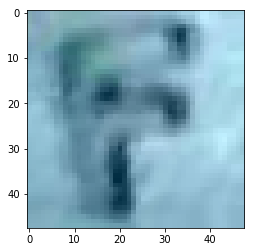

In [35]:
plt.imshow(xs[108])
plt.show()

In [39]:
ys[1]

array([1., 0., 0., 0.])

In [37]:
len(xs)

200